# 6.2 Exploring Relationships

## GDELT Conflict Dataset 1.0 (2021)

#### -Errol Hinkamp

##### Table of Contents

1. Import libraries
2. Import data
3. Create correlation matrix heatmap
4. Create scatterplot
5. Create pair plot
6. Create categorical plot
7. Answering questions
- 7.1 Have violent occurances increased or decreased over time? What about types of events?
- 7.2 Are certain areas more prone to violent events than others? Have these areas changed over time?
8. New questions & hypotheses
9. Export dataset

# 1. Import libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import matplotlib

# 2. Import data

In [2]:
# Import dataframe
path=r'C:\Users\Errol\Documents\Data Analyst Work\Achievement 6'
df = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'gdelt_conflict_1_0.csv'))

In [3]:
# Disable column limits
pd.options.display.max_columns = None

In [4]:
# List columns
df.columns

Index(['Year', 'CountryCode', 'CountryName', 'SumEvents', 'TotalEvents',
       'NormalizedEvents1000', 'EventRootCode', 'EventRootDescr', 'EventCode',
       'EventDescr', 'GoldsteinScale', 'AvgNumMentions', 'SumNumMentions',
       'AvgAvgTone'],
      dtype='object')

In [5]:
# Drop unecessary columns
df=df[['Year','CountryName','SumEvents','EventRootDescr','EventDescr','GoldsteinScale','AvgNumMentions','SumNumMentions','AvgAvgTone']]

##### I dropped numerical codes in favor of their descriptions. I also dropped the "TotalEvents," and "NormalizedEvents1000" columns as according to the documentation, those are are of questionable reliability.

In [6]:
# Drop all values for 2021, as the data is incomplete
df=df[df['Year'] != 2021]
df

,Year,CountryName,SumEvents,EventRootDescr,EventDescr,GoldsteinScale,AvgNumMentions,SumNumMentions,AvgAvgTone
0,1979,China,350,FIGHT,Fight with small arms and light weapons,-10.0,3.988571,1396,1.906000
1,1979,Croatia,14,FIGHT,"Use conventional military force, not specified...",-10.0,2.642857,37,4.335594
2,1979,Sudan,16,COERCE,"Arrest, detain, or charge with legal action",-5.0,6.000000,96,3.358047
3,1979,Syria,71,FIGHT,Fight with small arms and light weapons,-10.0,3.647887,259,3.557653
4,1979,Germany,33,COERCE,"Impose administrative sanctions, not specified...",-5.0,4.484848,148,4.841399
...,...,...,...,...,...,...,...,...,...
171789,2020,Paraguay,1,USE UNCONVENTIONAL MASS VIOLENCE,Engage in ethnic cleansing,-10.0,2.000000,2,-0.833333
171790,2020,Andorra,1,ASSAULT,Assassinate,-10.0,8.000000,8,-2.494443
171791,2020,Gibraltar,4,FIGHT,Employ aerial weapons,-10.0,3.750000,15,-1.181874
171792,2020,Gaza Strip,2,ASSAULT,Kill by physical assault,-10.0,5.000000,10,-7.157464


# 3. Create correlation matrix heatmap

In [7]:
# Create correlation matrix
df.corr()

,Year,SumEvents,GoldsteinScale,AvgNumMentions,SumNumMentions,AvgAvgTone
Year,1.000000,0.047541,-0.016216,0.298908,0.041803,-0.590660
SumEvents,0.047541,1.000000,0.007105,0.045456,0.962422,-0.048462
GoldsteinScale,-0.016216,0.007105,1.000000,0.013865,0.002900,0.044741
AvgNumMentions,0.298908,0.045456,0.013865,1.000000,0.049394,-0.302911
SumNumMentions,0.041803,0.962422,0.002900,0.049394,1.000000,-0.049314
AvgAvgTone,-0.590660,-0.048462,0.044741,-0.302911,-0.049314,1.000000


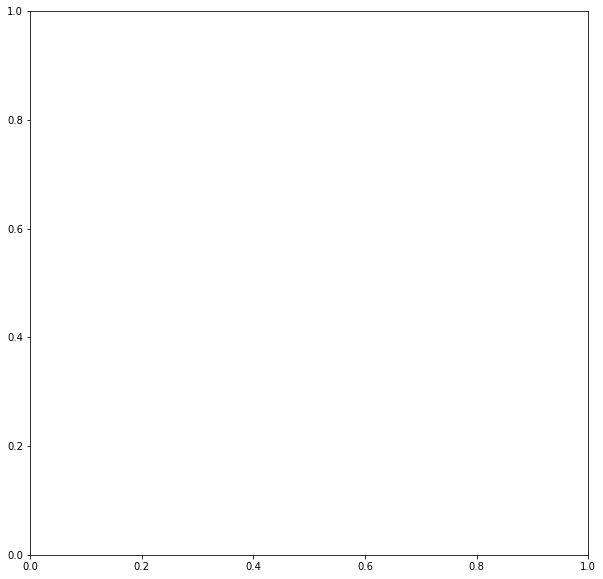

In [8]:
# Create subplot
f,ax = plt.subplots(figsize=(10,10))

In [9]:
# Create correlation heatmap
corr = sns.heatmap(df.corr(), annot = True, ax = ax) 

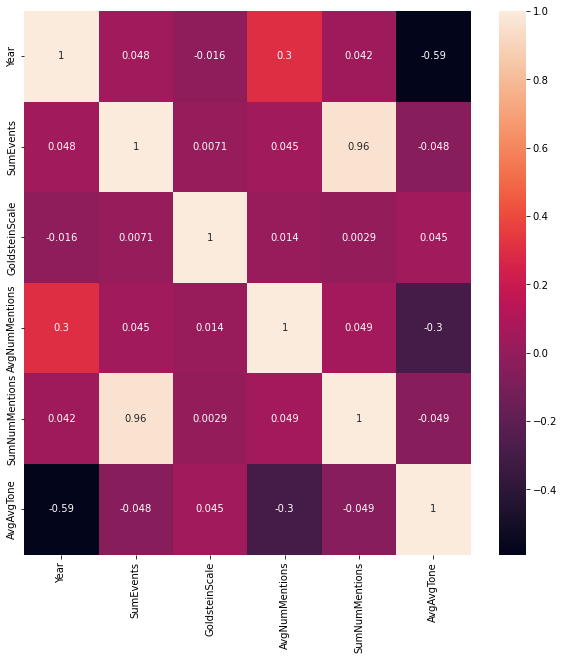

In [10]:
# Display heatmap
corr.figure

##### The average number of mentions seems to go up and the average tone seems to go down with time. Also, the greater the average number of mentions that events have, the more negatively they seem to be viewed. There's a nearly perfect correlation between the sum of events and the sum of their mentions. All that said, most of these values are either very subjective or fail to take important factors into consideration. For this reason, I'm skeptical of their value.

# 4. Create scatterplot

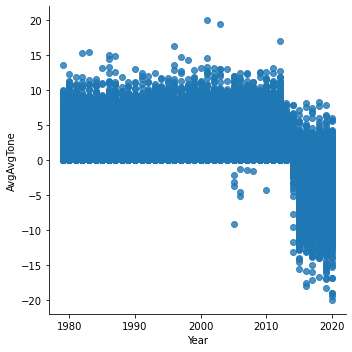

In [11]:
# Create scatterplot of year vs avg tone
sns.lmplot(x = 'Year', y = 'AvgAvgTone', data = df)

##### It is extremely curious that almost all events were viewed positively until around 2013 or so, when more and more events are viewed negatively. I suspect that there was a shift in how the "tone" was defined around that year. Alternatively, perhaps earlier years had fewer and more biased media pools to work from.

# 5. Create pair plot

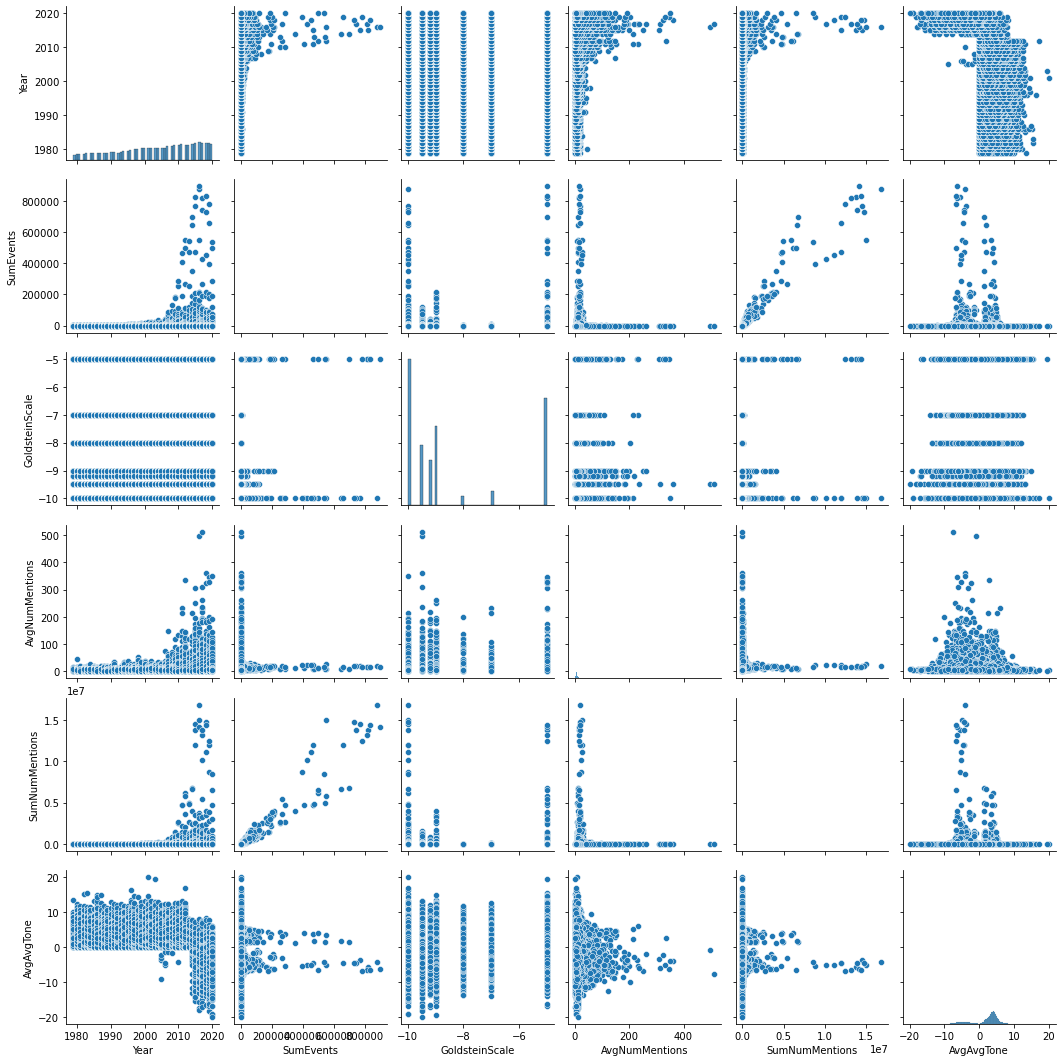

In [12]:
# Create pair plot 

g = sns.pairplot(df)

##### The most noteworthy observation is that the average number of mentions and the total number of mentions increase as the years go on, starting around 2005. This can probably be attributed to the rise of the internet and the greater variety of news options that it allows. The sum of events also increases around this time and displays a strong positive relationship with the sum of the number of mentions.

# 6. Create categorical plot

<AxesSubplot:xlabel='GoldsteinScale', ylabel='Count'>

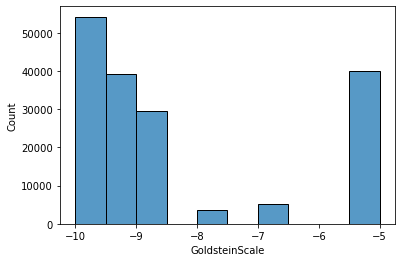

In [14]:
# Create histogram of Goldstein Scale to determine destabilization categories
sns.histplot(df['GoldsteinScale'], bins = 10)

In [15]:
# Create categories
df.loc[(df['GoldsteinScale'] >= -3.33) & (df['GoldsteinScale'] < 0), 'Destabilization category'] = 'Mildly destabilizing'
df.loc[(df['GoldsteinScale'] >= -6.67) & (df['GoldsteinScale'] < -3.33), 'Destabilization category'] = 'Moderately destabilizing'
df.loc[df['GoldsteinScale'] < -6.67, 'Destabilization category'] = 'Extremely destabilizing'

In [16]:
# Check categories
df['Destabilization category'].value_counts(dropna = False)

Extremely destabilizing     131820
Moderately destabilizing     39974
Name: Destabilization category, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, '1979'),
  Text(1, 0, '1980'),
  Text(2, 0, '1981'),
  Text(3, 0, '1982'),
  Text(4, 0, '1983'),
  Text(5, 0, '1984'),
  Text(6, 0, '1985'),
  Text(7, 0, '1986'),
  Text(8, 0, '1987'),
  Text(9, 0, '1988'),
  Text(10, 0, '1989'),
  Text(11, 0, '1990'),
  Text(12, 0, '1991'),
  Text(13, 0, '1992'),
  Text(14, 0, '1993'),
  Text(15, 0, '1994'),
  Text(16, 0, '1995'),
  Text(17, 0, '1996'),
  Text(18, 0, '1997'),
  Text(19, 0, '1998'),
  Text(20, 0, '1999'),
  Text(21, 0, '2000'),
  Text(22, 0, '2001'),
  Text(23, 0, '2002'),
  Text(24, 0, '2003'),
  Text(25, 0, '2004'),
  Text(26, 0, '2005'),
  Text(27, 0, '2006'),
  Text(28, 0, '2007'),
  Text(29, 0, '2008'),
  Text(30, 0, '2009'),
  Text(31, 0, '2010'),
  Text(32, 0, '2011'),
  Text(33, 0, '2012'),
  Text(34, 0, '2013'),
  Text(35, 

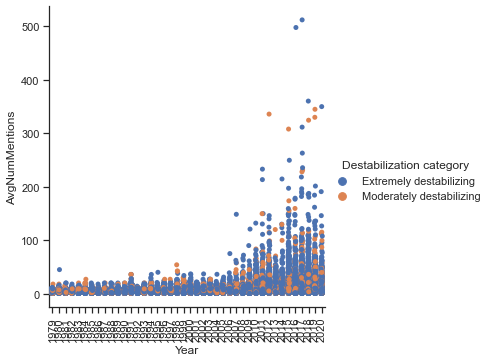

In [17]:
# Create categorical plot of year vs avg mentions by destabilization category
sns.set(style="ticks")
cplot = sns.catplot(x='Year', y='AvgNumMentions', hue='Destabilization category', data=df)
plt.xticks(rotation=90)

##### For some reason, when I rotate the x-axis labels it spits out a bunch of text. I'm not sure why it's doing this or how to get it to stop.

##### It does not appear that "extremely destabilizing" events get any more mentions on the whole than "moderately destabilizing" events. It must be remembered that the Goldstein Score doesn't take the magnitude of an event into account, so these "extremely destabilizing" events might not be as bad as presumed.

# 7. Answering questions

### 7.1 Have violent occurances increased or decreased over time? What about types of events?

In [18]:
# Calculate events per year
events_year=df.groupby('Year')['SumEvents'].sum()
events_year

Year
1979      41454
1980      64878
1981      85421
1982     101142
1983     113774
1984     119871
1985     136185
1986     139007
1987     135084
1988     142344
1989     119117
1990     109600
1991     144343
1992      95040
1993     147175
1994     194874
1995     214475
1996     281491
1997     306343
1998     375280
1999     468992
2000     488483
2001     585743
2002     536664
2003     626536
2004     596815
2005     452435
2006     838477
2007    1566657
2008    1859647
2009    2849824
2010    2800136
2011    4201065
2012    4635742
2013    4660831
2014    6680649
2015    8647017
2016    9534201
2017    8171952
2018    7447721
2019    6795639
2020    5034022
Name: SumEvents, dtype: int64

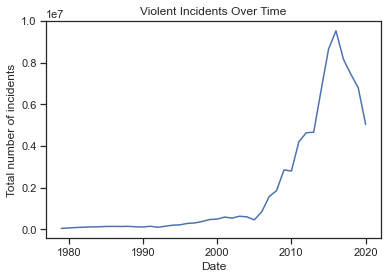

In [20]:
# Make line graph of events over time
sns.lineplot(data=events_year)
plt.title('Violent Incidents Over Time')
plt.xlabel('Date')
plt.ylabel('Total number of incidents')
plt.show()

##### Violence was mostly steady until around 2005, when it shot up until around 2016, then started to drop off again.

In [21]:
# Make crosstab of event descriptions over time
crosstab_eventdescr_year=pd.crosstab(df['Year'], df['EventDescr'], values=df['SumEvents'], aggfunc='sum').fillna(0)
crosstab_eventdescr_year

EventDescr,"Abduct, hijack, or take hostage","Arrest, detain, or charge with legal action",Assassinate,Attempt to assassinate,Ban political parties or politicians,Carry out car bombing,Carry out roadside bombing,Carry out suicide bombing,"Coerce, not specified below","Conduct suicide, car, or other non-military bombing, not spec below",Confiscate property,Destroy property,Employ aerial weapons,Engage in ethnic cleansing,Engage in mass expulsion,Engage in mass killings,Expel or deport individuals,Fight with artillery and tanks,Fight with small arms and light weapons,"Impose administrative sanctions, not specified below","Impose blockade, restrict movement",Impose curfew,Impose restrictions on political freedoms,Impose state of emergency or martial law,Kill by physical assault,Occupy territory,"Physically assault, not specified below","Seize or damage property, not specified below",Sexually assault,Torture,Use as human shield,"Use conventional military force, not specified below",Use tactics of violent repression,"Use unconventional violence, not specified below",Violate ceasefire
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1979,1040.0,7749.0,931.0,47.0,18.0,27.0,0.0,4.0,119.0,358.0,192.0,446.0,851.0,0.0,9.0,96.0,785.0,611.0,4091.0,1660.0,200.0,84.0,237.0,45.0,33.0,2301.0,393.0,147.0,93.0,257.0,0.0,16587.0,115.0,1921.0,7.0
1980,2161.0,12654.0,1390.0,127.0,41.0,17.0,0.0,0.0,231.0,511.0,267.0,692.0,2013.0,0.0,6.0,62.0,1466.0,1112.0,5882.0,2729.0,360.0,161.0,392.0,138.0,49.0,2920.0,697.0,197.0,123.0,369.0,0.0,25074.0,276.0,2753.0,8.0
1981,1691.0,16694.0,2529.0,262.0,65.0,47.0,0.0,0.0,423.0,935.0,361.0,739.0,2540.0,1.0,10.0,110.0,1478.0,2202.0,9067.0,3259.0,391.0,138.0,438.0,228.0,143.0,2993.0,1016.0,292.0,198.0,454.0,0.0,33141.0,394.0,3173.0,9.0
1982,2205.0,18688.0,1839.0,215.0,49.0,75.0,0.0,0.0,396.0,1124.0,424.0,1002.0,3690.0,0.0,10.0,694.0,1490.0,2531.0,10312.0,3876.0,694.0,244.0,646.0,428.0,93.0,4842.0,1221.0,301.0,158.0,454.0,0.0,38655.0,447.0,4309.0,30.0
1983,2552.0,21882.0,1942.0,224.0,73.0,156.0,0.0,33.0,433.0,1370.0,563.0,878.0,2737.0,0.0,27.0,474.0,2796.0,3303.0,11212.0,4754.0,656.0,268.0,592.0,212.0,181.0,4460.0,1259.0,344.0,171.0,471.0,0.0,44834.0,685.0,4203.0,29.0
1984,2694.0,21729.0,2282.0,195.0,40.0,82.0,0.0,68.0,470.0,1346.0,413.0,1131.0,3914.0,2.0,4.0,188.0,2060.0,3238.0,12729.0,4599.0,921.0,362.0,747.0,277.0,130.0,4135.0,1567.0,346.0,221.0,606.0,0.0,47680.0,630.0,5057.0,8.0
1985,5371.0,26454.0,2118.0,227.0,62.0,186.0,0.0,128.0,453.0,1515.0,503.0,1327.0,4413.0,3.0,14.0,287.0,2407.0,3366.0,13349.0,5276.0,858.0,289.0,624.0,372.0,252.0,4194.0,2058.0,281.0,263.0,680.0,0.0,53477.0,664.0,4696.0,18.0
1986,4957.0,27801.0,2286.0,283.0,77.0,160.0,1.0,65.0,457.0,1797.0,535.0,1200.0,5886.0,0.0,9.0,233.0,3485.0,3141.0,12196.0,6468.0,779.0,359.0,744.0,474.0,422.0,4115.0,2155.0,382.0,158.0,756.0,0.0,52292.0,848.0,4477.0,9.0
1987,5159.0,26449.0,1664.0,235.0,60.0,114.0,1.0,22.0,530.0,1488.0,588.0,1204.0,5784.0,0.0,22.0,370.0,2924.0,4602.0,11311.0,5636.0,828.0,381.0,805.0,329.0,241.0,4297.0,2062.0,357.0,166.0,926.0,0.0,50334.0,1173.0,5008.0,14.0


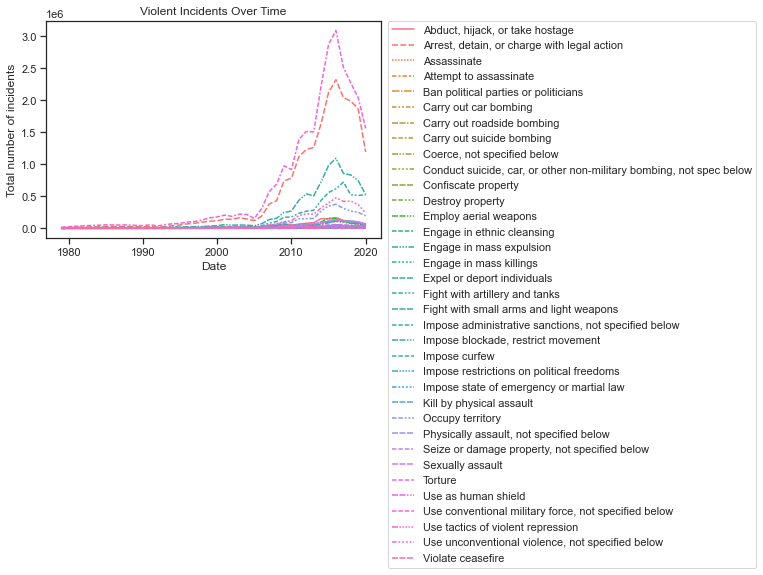

In [22]:
# Make line graph of categories over time
sns.lineplot(data=crosstab_eventdescr_year)
plt.title('Violent Incidents Over Time')
plt.xlabel('Date')
plt.ylabel('Total number of incidents')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

##### The sheer number of event types makes them a bit hard to differentiate, but it's clear that most of the categories were pretty low. The largest categories were the generic "conventional military force" and "arrest" events, which far outstripped all of the others starting around 2005.

### 7.2 Are certain areas more prone to violent events than others? Have these areas changed over time?

In [23]:
# Make crosstab of incidents by country over time
crosstab_country_year=pd.crosstab(df['Year'], df['CountryName'], values=df['SumEvents'], aggfunc='sum').fillna(0)
crosstab_country_year

CountryName,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antarctica,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,"Bahamas, The",Bahrain,Baker Island,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Bouvet Island,Brazil,British Indian Ocean Territory,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cambodia,Cameroon,Canada,Cape Verde,Cayman Islands,Central African Republic,Chad,Chile,China,Christmas Island,Clipperton Island,Colombia,Comoros,"Congo, Democratic Republic of the","Congo, Republic of the",Cook Islands,Coral Sea Islands,Costa Rica,Cote d'Ivoire,Croatia,Cuba,Cyprus,Czech Republic,Denmark,Djibouti,Dominica,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Ethiopia,Europa Island,Falkland Islands (Islas Malvinas),Faroe Islands,Fiji,Finland,France,French Guiana,French Polynesia,Gabon,"Gambia, The",Gaza Strip,Georgia,Germany,Ghana,Gibraltar,Greece,Greenland,Grenada,Guadeloupe,Guam,Guatemala,Guernsey,Guinea,Guinea-Bissau,Guyana,Haiti,Heard Island and McDonald Islands,Honduras,Hong Kong,Howland Island,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Isle of Man,Israel,Italy,Jamaica,Jan Mayen,Japan,Jarvis Island,Jersey,Johnston Atoll,Jordan,Kazakhstan,Kenya,Kiribati,"Korea, North","Korea, South",Kosovo,Kuwait,Kyrgyzstan,Laos,Latvia,Lebanon,Lesotho,Liberia,Libya,Liechtenstein,Lithuania,Luxembourg,Macau,Macedonia,Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Marshall Islands,Martinique,Mauritania,Mauritius,Mayotte,Mexico,"Micronesia, Federated States of",Midway Islands,Moldova,Monaco,Mongolia,Montenegro,Montserrat,Morocco,Mozambique,Myanmar,Namibia,Nauru,Navassa Island,Nepal,Netherlands,New Caledonia,New Zealand,Nicaragua,Niger,Nigeria,Niue,Norfolk Island,Northern Mariana Islands,Norway,Oman,Pakistan,Palau,Palmyra Atoll,Panama,Papua New Guinea,Paracel Islands,Paraguay,Peru,Philippines,Pitcairn Islands,Poland,Portugal,Puerto Rico,Qatar,Reunion,Romania,Russia,Rwanda,Saint Helena,Saint Kitts and Nevis,Saint Lucia,Saint Martin,Saint Pierre and Miquelon,Saint Vincent and the Grenadines,Samoa,San Marino,Sao Tome and Principe,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Spratly Islands,Sri Lanka,Sudan,Suriname,Svalbard,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Tokelau,Tonga,Trinidad and Tobago,Tromelin Island,Tunisia,Turkey,Turkmenistan,Turks and Caicos Islands,Tuvalu,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Vatican City,Venezuela,Vietnam,"Virgin Islands, British","Virgin Islands, U.S.",Wake Island,Wallis and Futuna,West Bank,Western Sahara,Yemen,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1979,705.0,72.0,55.0,0.0,0.0,236.0,0.0,1.0,0.0,152.0,50.0,0.0,78.0,56.0,46.0,20.0,9.0,0.0,19.0,6.0,4.0,79.0,0.0,8.0,6.0,2.0,75.0,7.0,95.0,0.0,38.0,0.0,3.0,56.0,0.0,54.0,4.0,869.0,5.0,195.0,1.0,0.0,93.0,83.0,165.0,2788.0,0.0,0.0,84.0,1.0,10.0,5.0,2.0,0.0,220.0,4.0,21.0,223.0,53.0,95.0,34.0,9.0,4.0,17.0,17.0,416.0,314.0,25.0,97.0,6.0,188.0,0.0,0.0,0.0,13.0,40.0,586.0,0.0,0.0,5.0,5.0,12.0,11.0,707.0,60.0,0.0,73.0,0.0,37.0,8.0,0.0,81.0,0.0,16.0,0.0,50.0,18.0,0.0,31.0,32.0,0.0,74.0,2.0,202.0,48.0,3431.0,332.0,456.0,0.0,2411.0,550.0,3.0,0.0,262.0,0.0,2.0,0.0,72.0,0.0,163.0,0.0,48.0,409.0,2.0,53.0,1.0,146.0,13.0,1093.0,47.0,36.0,134.0,1.0,32.0,50.0,2.0,20.0,0.0,12.0,70.0,1.0,4.0,8.0,0.0,5.0,33.0,0.0,0.0,242.0,7.0,0.0,1.0,1.0,17.0,4.0,0.0,132.0,477.0,54.0,154.0,0.0,0.0,24.0,105.0,0.0,13.0,968.0,6.0,78.0,0.0,0.0,6.0,26.0,18.0,385.0,0.0,0.0,74.0,7.0,0.0,20.0,55.0,148.0,0.0,260.0,66.0,14.0,9.0,0.0,32.0,1629.0,9.0,0.0,0

##### There are far too many data points to make a legible graph. I'd have to condense the countries into regions, which might lose some nuance. Perhaps an interactive graph that allows me to select only specific countries, like in Tableau? A heatmap over time would also be a good visual.

# 8. New questions & hypotheses

##### Does the level of a country's development affect the type and number of violent incidents? I suspect that "developed" countries might have fewer instances of things like suicide bombings and genocide, but that doesn't mean that they can't still have a lot of arrests or property damage.

##### Would this data look different if it was presented as incidents per capita rather than raw incidents?

# 9. Export final dataset

In [24]:
# Export trimmed dataset
df.to_csv(os.path.join(path, '02 Data','Prepared Data', 'gdelt_trimmed.csv'))